# Chart Assignment

The assignment:
>Using the Mountain Lion data from earlier this semester, make a bar chart of the top 10 counties for sightings. Create three different versions, with three different set_styles and three different colors. In your Jupyter Notebook, tell me which one you like the most and why. And what is the main weakness of your chart?

Import agate.

In [1]:
import agate

We're importing our mountain lion data to add a column counting the data.

In [2]:
lions = agate.Table.from_csv('mountainlions.csv')

Print the table to see the column names.

In [3]:
print(lions)

|--------------+------------|
|  column      | data_type  |
|--------------+------------|
|  ID          | Number     |
|  Cofirm Type | Text       |
|  COUNTY      | Text       |
|  Date        | Date       |
|--------------+------------|



Now, we'll group by the county name.

In [4]:
counties = lions.group_by('COUNTY')

And add a column with that count.

In [5]:
county_totals = counties.aggregate([
        ('count', agate.Count())
    ])

Sort by that count.

In [6]:
county_totals = county_totals.order_by('count', reverse=True)

Limit the data to the top 20 counties.

In [7]:
county_totals = county_totals.limit(20)

And export it to a new CSV

In [8]:
county_totals.to_csv('lions.csv')

Now we'll import the graphing libraries.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(style="ticks")
%matplotlib inline

Import the data.

In [10]:
df = pd.read_csv('lions.csv')

Print the data.

In [11]:
print (df)

          COUNTY  count
0          Dawes    111
1          Sioux     52
2       Sheridan     37
3         Cherry     30
4   Scotts Bluff     26
5      Keya Paha     20
6          Brown     15
7           Rock     11
8        Lincoln     10
9         Custer      8
10          Knox      8
11        Banner      6
12        Thomas      5
13        Dawson      5
14        Nemaha      5
15     Box Butte      4
16        Howard      3
17        Dakota      3
18        Blaine      3
19       Buffalo      3


Graph it using one set of parameters.

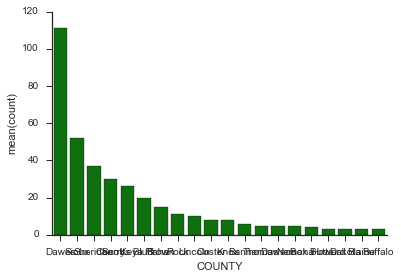

In [12]:
sns.set_style("ticks")
sns.barplot(x="COUNTY", y="count", data=df, color="g")
sns.despine()

Now, graph it using another set of parameters. Change the axes and this time use a dark grid and red bars.

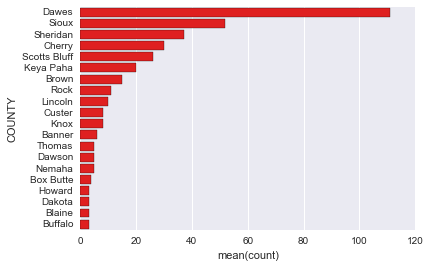

In [13]:
sns.set_style("darkgrid")
sns.barplot(x="count", y="COUNTY", data=df, color="r")

Now, switch the style again, changing the bar color to blue and removing the background color.

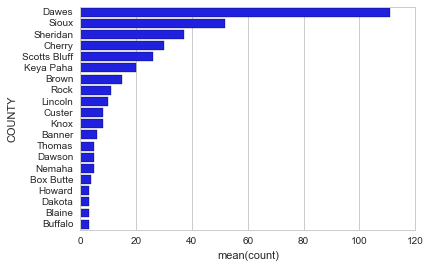

In [14]:
sns.set_style("whitegrid")
sns.barplot(x="count", y="COUNTY", data=df, color="b")

Out of these three, I like this last one the most. The lines going through the graph help, since the longest line is furthest from the axis. I think the biggest weakness with all of the graphs is that it is limited to a fixed window. This causes the names to overlap in the first graph. 